<h1 align=center><font size = 5><b>Diabetes prediction project</b></font></h1>

<h3 align=center><font size = 3><b>A project by Boris Y. Nedyalkov</b></font></h3>
<h3 align=center><font size = 3>With data from https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset</font></h3>

<center> <img src="https://maldita.es/uploads/images/2021/11/618e89365f697edittowfiqu-barbhuiya-zjak9jqxeda-unsplash-jpg.jpg" width=700, height=700 /></center> 

Image source: https://maldita.es/malditaciencia/20221114/preguntas-respuestas-diabetes/

### Notes:

* The data had many missing values, whcih were replaced by mean od KNN ML algorithm
* The data most likely refers to diabetes type 2 patients due to the insulin levels seen in part 2 of the project

In [477]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [478]:
df = pd.read_csv("data_prepared_for_ML.csv")

In [479]:
# df = df.drop(['BloodPressure','SkinThickness'],axis=1)

In [480]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    334.2  33.6   
1            1.0     85.0           66.0           29.0     56.2  26.6   
2            8.0    183.0           64.0           32.2    238.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    150.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           26.4    122.4  30.1   
767          1.0     93.0           70.0           31.0     72.4  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                       0.351  31.0      0.0  
2                       0.672  32.0      1.0  
3                       0.167  21.0      0.0  
4                       2.288  33.0      1.0  
..                        ...   ...      ...  
763                     0.171  63.0      0.0  
764                     0.340  27.0      0.0  
765                     0.245  30.0      0.0  
766                     0.349  47.0      1.0  
767                     0.315  23.0      0.0  

[768 rows x 9 columns]

### Split and normalize the data set

In [481]:
y = df['Outcome'].values
X_df = df.drop(['Outcome'], axis=1)
X = X_df.values

In [482]:
# standardize features 
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

# # normalize features 
# X = preprocessing.MinMaxScaler().fit(X).transform(X) 

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (576, 8) (576,)
Test set: (192, 8) (192,)


## ML with Logistic Regression

### Logistic regression (untuned)

In [484]:
# import the classes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, class_weight='balanced')

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)

In [485]:
print("LR's Train Accuracy: ", logreg.score(X_train, y_train))
print("LR's Test Accuracy: ", logreg.score(X_test, y_test))

LR's Train Accuracy:  0.7690972222222222
LR's Test Accuracy:  0.78125


In [698]:
# def plot_confusion_matrix(y,y_predict):
#     "this function plots the confusion matrix"
#     from sklearn.metrics import confusion_matrix

#     cm = confusion_matrix(y, y_predict)
#     ax= plt.subplot()
#     sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
#     ax.set_xlabel('Predicted labels')
#     ax.set_ylabel('True labels')
#     ax.set_title('Confusion Matrix'); 
#     #ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
#     plt.show() 

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    plt.figure(figsize=(8, 6), dpi = 120)
    plot = sns.heatmap(cm, annot=True); #annot=True to annotate cells
    plot.set_xlabel('Predicted labels')
    plot.set_ylabel('True labels')
    plot.set_title('Confusion Matrix'); 
    plt.savefig('confusion_matrix', transparent=True, bbox_inches='tight')
    #ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 
    

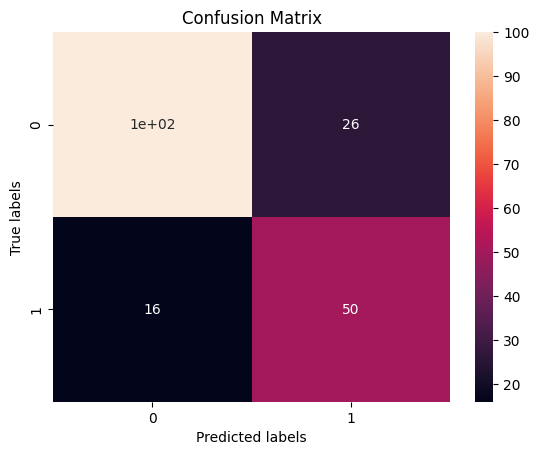

In [487]:
plot_confusion_matrix(y_test,y_pred)

In [488]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83       126
         1.0       0.66      0.76      0.70        66

    accuracy                           0.78       192
   macro avg       0.76      0.78      0.77       192
weighted avg       0.79      0.78      0.78       192



In [489]:
roc_auc_score(y_test,y_pred)

0.7756132756132756

In [490]:
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, precision_recall_curve

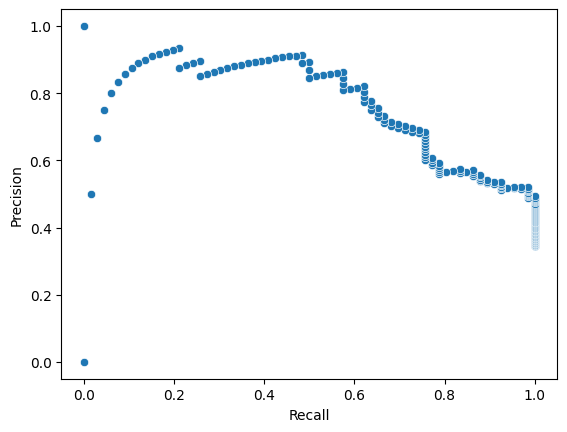

In [491]:
precision, recall, thresholds = precision_recall_curve(y_test,y_proba[:,1])
# print('Precision:',precision,'\n',
#      'Recall:',recall,'\n',
#      'Threshold:',thresholds)

plot = sns.scatterplot(x=recall, y=precision)
plot.set_xlabel('Recall')
plot.set_ylabel('Precision')
plt.show()

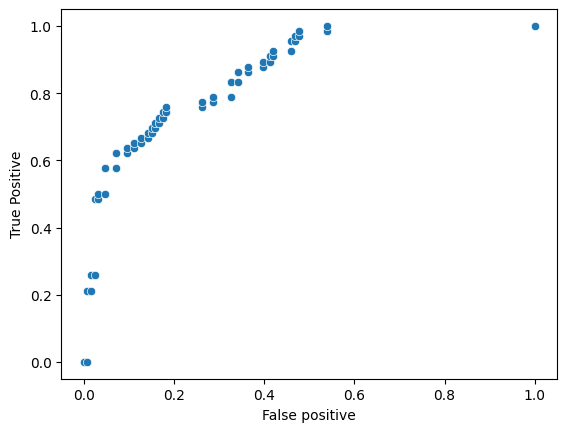

In [493]:
fpr, tpr, _ = roc_curve(y_test,y_proba[:,1])
plot = sns.scatterplot(x=fpr, y=tpr)
plot.set_xlabel('False positive')
plot.set_ylabel('True Positive')
plt.show()

In [494]:
def thresholds_tests (X_test, y_test, model):
    pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
    threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
    y_test = pd.DataFrame(y_test)
    for i in threshold_list:
        print ('\n******** For i = {} ******'.format(i))
        y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
        test_accuracy = accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                               y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))
        print('Our testing accuracy is {}'.format(test_accuracy))

        print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                               y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))
        


In [495]:
def manual_threshold_model(threshold_val, X_test, y_test, model):
    
    pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
    y_test = pd.DataFrame(y_test)
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>threshold_val else 0)
    test_accuracy = accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))
    print('The testing accuracy is {}'.format(test_accuracy))
    
    y_pred = y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)

    return y_pred

In [496]:
thresholds_tests (X_test,y_test, logreg)


******** For i = 0.05 ******
Our testing accuracy is 0.3697916666666667
[[  5 121]
 [  0  66]]

******** For i = 0.1 ******
Our testing accuracy is 0.484375
[[27 99]
 [ 0 66]]

******** For i = 0.15 ******
Our testing accuracy is 0.59375
[[48 78]
 [ 0 66]]

******** For i = 0.2 ******
Our testing accuracy is 0.6510416666666666
[[60 66]
 [ 1 65]]

******** For i = 0.25 ******
Our testing accuracy is 0.6822916666666666
[[67 59]
 [ 2 64]]

******** For i = 0.3 ******
Our testing accuracy is 0.6927083333333334
[[72 54]
 [ 5 61]]

******** For i = 0.35 ******
Our testing accuracy is 0.71875
[[80 46]
 [ 8 58]]

******** For i = 0.4 ******
Our testing accuracy is 0.7291666666666666
[[83 43]
 [ 9 57]]

******** For i = 0.45 ******
Our testing accuracy is 0.7447916666666666
[[92 34]
 [15 51]]

******** For i = 0.5 ******
Our testing accuracy is 0.78125
[[100  26]
 [ 16  50]]

******** For i = 0.55 ******
Our testing accuracy is 0.7916666666666666
[[104  22]
 [ 18  48]]

******** For i = 0.6 **

The testing accuracy is 0.65625


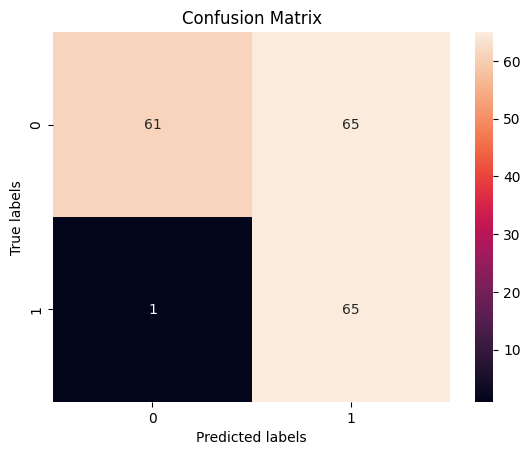

In [497]:
y_pred=manual_threshold_model(0.202, X_test, y_test, logreg)
plot_confusion_matrix(y_test,y_pred)

#### Best recall at treshold value of 0.202

### Hyperparameter tuning of Logistic Regression

In [498]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [499]:
model = LogisticRegression(class_weight='balanced')
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.838993 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.837131 (0.046028) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837131 (0.046028) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837131 (0.046028) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.837088 (0.046048) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837088 (0.046048) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837088 (0.046048) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.837180 (0.046280) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.837180 (0.046280) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.837135 (0.046302) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.838902 (0.045417) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.838902 (0.045417) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.838993 (0.045467) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.834746 (0.045303) wit

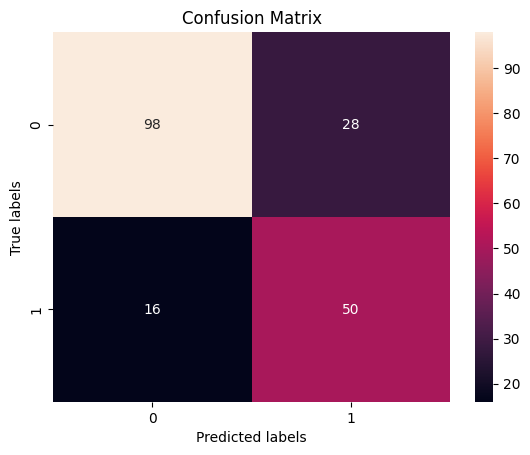

In [500]:
y_pred = grid_search.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

In [501]:
thresholds_tests (X_test, y_test, grid_search)


******** For i = 0.05 ******
Our testing accuracy is 0.3541666666666667
[[  2 124]
 [  0  66]]

******** For i = 0.1 ******
Our testing accuracy is 0.453125
[[ 21 105]
 [  0  66]]

******** For i = 0.15 ******
Our testing accuracy is 0.53125
[[36 90]
 [ 0 66]]

******** For i = 0.2 ******
Our testing accuracy is 0.625
[[54 72]
 [ 0 66]]

******** For i = 0.25 ******
Our testing accuracy is 0.6822916666666666
[[66 60]
 [ 1 65]]

******** For i = 0.3 ******
Our testing accuracy is 0.671875
[[68 58]
 [ 5 61]]

******** For i = 0.35 ******
Our testing accuracy is 0.703125
[[76 50]
 [ 7 59]]

******** For i = 0.4 ******
Our testing accuracy is 0.7239583333333334
[[82 44]
 [ 9 57]]

******** For i = 0.45 ******
Our testing accuracy is 0.7395833333333334
[[90 36]
 [14 52]]

******** For i = 0.5 ******
Our testing accuracy is 0.7708333333333334
[[98 28]
 [16 50]]

******** For i = 0.55 ******
Our testing accuracy is 0.7916666666666666
[[104  22]
 [ 18  48]]

******** For i = 0.6 ******
Our te

#### Same output as the simple LR

### Hyperparameter tuning of Ridge Classifier

In [502]:
from sklearn.linear_model import RidgeClassifier

In [503]:
ridgeclass = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=ridgeclass, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.835263 using {'alpha': 0.2}
0.835220 (0.046566) with: {'alpha': 0.1}
0.835263 (0.046551) with: {'alpha': 0.2}
0.835263 (0.046551) with: {'alpha': 0.3}
0.835219 (0.046539) with: {'alpha': 0.4}
0.835219 (0.046539) with: {'alpha': 0.5}
0.835130 (0.046563) with: {'alpha': 0.6}
0.835174 (0.046666) with: {'alpha': 0.7}
0.835174 (0.046666) with: {'alpha': 0.8}
0.835174 (0.046666) with: {'alpha': 0.9}
0.835174 (0.046666) with: {'alpha': 1.0}


#### Same output as the simple LR

## ML with Random forest 

### Random forest (untuned)

In [504]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(class_weight="balanced")

rforest.fit(X_train, y_train)

print(f'model score on training data: {rforest.score(X_train, y_train)}')
print(f'model score on testing data: {rforest.score(X_test, y_test)}')

model score on training data: 1.0
model score on testing data: 0.796875


In [505]:
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [506]:
y_pred = rforest.predict(X_test)
y_proba = rforest.predict_proba(X_test)

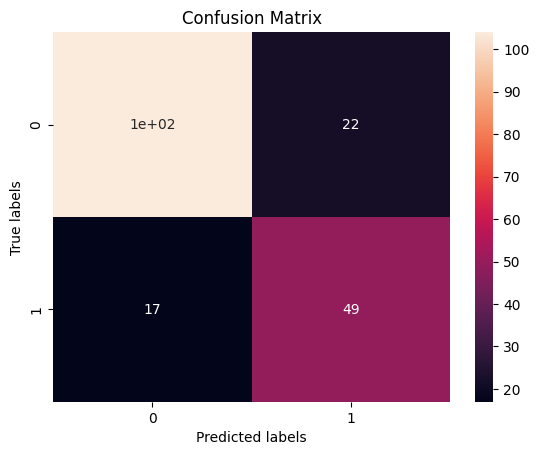

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       126
         1.0       0.69      0.74      0.72        66

    accuracy                           0.80       192
   macro avg       0.77      0.78      0.78       192
weighted avg       0.80      0.80      0.80       192



In [507]:
plot_confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

In [508]:
def feature_importance_grader(model):
    
    importances = model.feature_importances_

    indices = np.argsort(importances)

    fig, ax = plt.subplots()
    ax.barh(range(len(importances)), importances[indices])
    ax.set_yticks(range(len(importances)))
    _ = ax.set_yticklabels(np.array(df.columns)[indices])

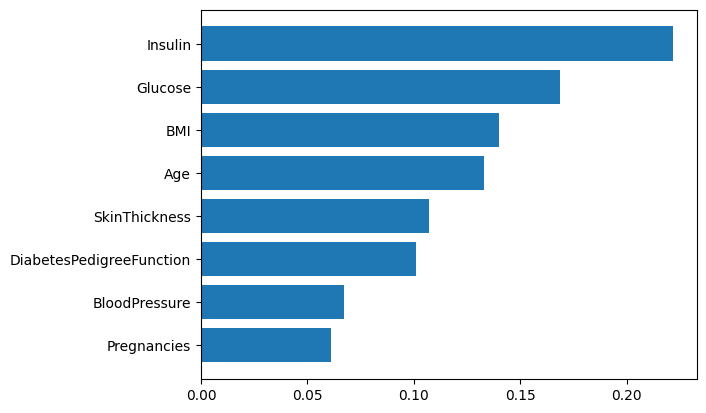

In [509]:
feature_importance_grader(model=rforest)

#### Did a bit better then the linear regressions (more precision for maximum recall)

In [510]:
thresholds_tests (X_test, y_test, rforest)


******** For i = 0.05 ******
Our testing accuracy is 0.5677083333333334
[[43 83]
 [ 0 66]]

******** For i = 0.1 ******
Our testing accuracy is 0.625
[[56 70]
 [ 2 64]]

******** For i = 0.15 ******
Our testing accuracy is 0.671875
[[66 60]
 [ 3 63]]

******** For i = 0.2 ******
Our testing accuracy is 0.7083333333333334
[[76 50]
 [ 6 60]]

******** For i = 0.25 ******
Our testing accuracy is 0.7291666666666666
[[80 46]
 [ 6 60]]

******** For i = 0.3 ******
Our testing accuracy is 0.7552083333333334
[[86 40]
 [ 7 59]]

******** For i = 0.35 ******
Our testing accuracy is 0.78125
[[95 31]
 [11 55]]

******** For i = 0.4 ******
Our testing accuracy is 0.8072916666666666
[[101  25]
 [ 12  54]]

******** For i = 0.45 ******
Our testing accuracy is 0.8020833333333334
[[102  24]
 [ 14  52]]

******** For i = 0.5 ******
Our testing accuracy is 0.796875
[[104  22]
 [ 17  49]]

******** For i = 0.55 ******
Our testing accuracy is 0.8229166666666666
[[111  15]
 [ 19  47]]

******** For i = 0.6

### Random forest (hypertuned)

First we starts with rough random search

In [511]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1800, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [512]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(class_weight="balanced", random_state = 16)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='roc_auc', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [513]:
rf_random.best_params_

{'n_estimators': 855,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [514]:
best_random = rf_random.best_estimator_

In [515]:
print(f'model score on training data: {best_random.score(X_train, y_train)}')
print(f'model score on testing data: {best_random.score(X_test, y_test)}')

model score on training data: 0.9826388888888888
model score on testing data: 0.8020833333333334


Let us see how the grid search can fine tune this

In [516]:
from sklearn.model_selection import GridSearchCV

In [517]:
# Number of trees in random forest
n_estimators = [800, 1000, 1200]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [40, 50, 60, 70]
# Minimum number of samples required to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid,
                              scoring='roc_auc', 
                              cv = 3, n_jobs=-1,
                              return_train_score=True)

# Fit the grid search model
rf_grid.fit(X_train, y_train);

In [518]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [519]:
best_grid = rf_grid.best_estimator_

In [520]:
print(f'model score on training data: {best_random.score(X_train, y_train)}')
print(f'model score on testing data: {best_random.score(X_test, y_test)}')

model score on training data: 0.9826388888888888
model score on testing data: 0.8020833333333334


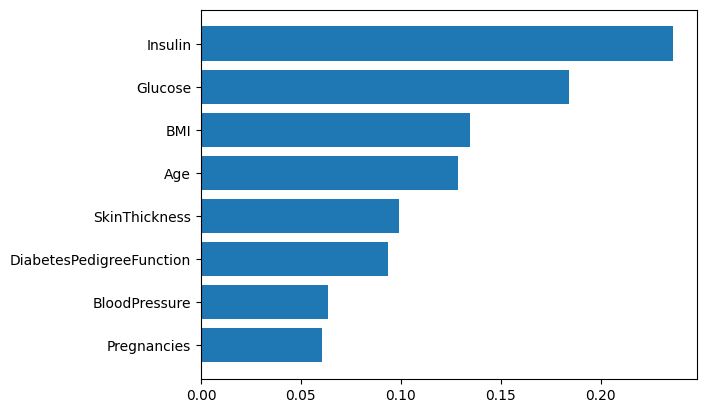

In [521]:
importances = best_random.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(df.columns)[indices])

In [522]:
thresholds_tests (X_test, y_test, best_random)


******** For i = 0.05 ******
Our testing accuracy is 0.5052083333333334
[[31 95]
 [ 0 66]]

******** For i = 0.1 ******
Our testing accuracy is 0.6197916666666666
[[54 72]
 [ 1 65]]

******** For i = 0.15 ******
Our testing accuracy is 0.6822916666666666
[[66 60]
 [ 1 65]]

******** For i = 0.2 ******
Our testing accuracy is 0.6927083333333334
[[71 55]
 [ 4 62]]

******** For i = 0.25 ******
Our testing accuracy is 0.7291666666666666
[[80 46]
 [ 6 60]]

******** For i = 0.3 ******
Our testing accuracy is 0.7395833333333334
[[82 44]
 [ 6 60]]

******** For i = 0.35 ******
Our testing accuracy is 0.7604166666666666
[[87 39]
 [ 7 59]]

******** For i = 0.4 ******
Our testing accuracy is 0.78125
[[93 33]
 [ 9 57]]

******** For i = 0.45 ******
Our testing accuracy is 0.78125
[[96 30]
 [12 54]]

******** For i = 0.5 ******
Our testing accuracy is 0.8020833333333334
[[103  23]
 [ 15  51]]

******** For i = 0.55 ******
Our testing accuracy is 0.8229166666666666
[[110  16]
 [ 18  48]]

******

## ML with XGBoost

### XGBoost (untuned)

In [523]:
import xgboost

In [524]:
xgboost_classifier = xgboost.XGBClassifier()

xgboost_classifier.fit(X_train, y_train)

print(f'model score on training data: {xgboost_classifier.score(X_train, y_train)}')
print(f'model score on testing data: {xgboost_classifier.score(X_test, y_test)}')

model score on training data: 1.0
model score on testing data: 0.7864583333333334


In [525]:
xgboost_classifier.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [526]:
y_pred = xgboost_classifier.predict(X_test)
y_proba = xgboost_classifier.predict_proba(X_test)

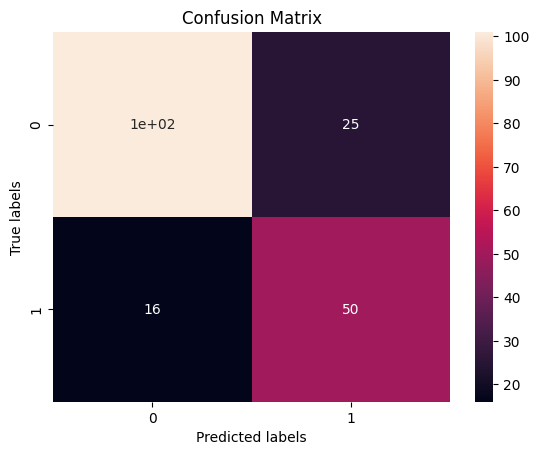

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       126
         1.0       0.67      0.76      0.71        66

    accuracy                           0.79       192
   macro avg       0.76      0.78      0.77       192
weighted avg       0.80      0.79      0.79       192



In [527]:
plot_confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

### XGBoost (hyperparameter-tuned)

In [588]:
params = {
 'n_estimators' : [100],
 'learning_rate' : [0.05,0.1],
 'max_depth' : [ 5, 6, 8, 10],
 'min_child_weight' : [ 1, 2, 3, 5 ],
 'gamma': [ 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.4, 0.5 , 0.7, 0.9 ]
}

In [589]:
rs_model=RandomizedSearchCV(xgboost_classifier,
                            param_distributions=params,
                            n_iter=50,scoring='roc_auc',
                            n_jobs=-1,
                            cv=4,
                            verbose=3)

In [590]:
#model fitting
rs_model.fit(X,y)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.03, 0.05, 0.1,
                                                          0.15],
                                        'max_depth': [3, 4, 5, 6, 8, 10],
                                        'min_child_weight': [1, 2, 3, 5],
                                        'n_estimators': [50, 100, 300]},
                   scoring='roc_auc', verbose=3)

In [591]:
# best parameters selected
best_random_xgboost = rs_model.best_estimator_
best_random_xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [601]:
from sklearn.model_selection import cross_val_score, KFold

score=cross_val_score(best_random_xgboost,X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc')
print('Train cross validation scores:',score)

score=cross_val_score(best_random_xgboost,X_test, y_test, cv=KFold(10, shuffle=True), scoring='roc_auc')
print('Tests cross validation scores:',score)

Train cross validation scores: [0.8088411  0.78622669 0.90530846 0.80344333 0.86100386 0.82995951
 0.86904762 0.84656085 0.91931217 0.77910053]
Tests cross validation scores: [0.85858586 0.97333333 0.82142857 0.76190476 0.78888889 0.88888889
 0.83333333 0.97058824 0.77142857 0.64285714]


In [593]:
print(f'model score on training data: {best_random_xgboost.score(X_train, y_train)}')
print(f'model score on testing data: {best_random_xgboost.score(X_test, y_test)}')

model score on training data: 0.9548611111111112
model score on testing data: 0.9791666666666666


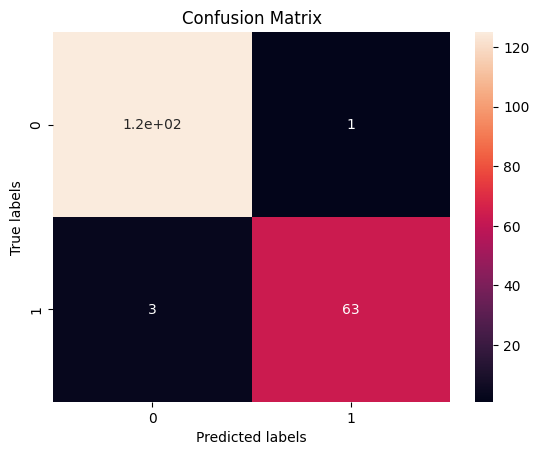

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       126
         1.0       0.98      0.95      0.97        66

    accuracy                           0.98       192
   macro avg       0.98      0.97      0.98       192
weighted avg       0.98      0.98      0.98       192



In [663]:
y_pred = best_random_xgboost.predict(X_test)
# y_proba = best_random_xgboost.predict_proba(X_test)

plot_confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

In [602]:
thresholds_tests (X_test, y_test, best_random_xgboost)


******** For i = 0.05 ******
Our testing accuracy is 0.6510416666666666
[[59 67]
 [ 0 66]]

******** For i = 0.1 ******
Our testing accuracy is 0.7447916666666666
[[77 49]
 [ 0 66]]

******** For i = 0.15 ******
Our testing accuracy is 0.8177083333333334
[[91 35]
 [ 0 66]]

******** For i = 0.2 ******
Our testing accuracy is 0.8697916666666666
[[101  25]
 [  0  66]]

******** For i = 0.25 ******
Our testing accuracy is 0.9010416666666666
[[107  19]
 [  0  66]]

******** For i = 0.3 ******
Our testing accuracy is 0.9270833333333334
[[112  14]
 [  0  66]]

******** For i = 0.35 ******
Our testing accuracy is 0.9427083333333334
[[116  10]
 [  1  65]]

******** For i = 0.4 ******
Our testing accuracy is 0.96875
[[121   5]
 [  1  65]]

******** For i = 0.45 ******
Our testing accuracy is 0.9895833333333334
[[125   1]
 [  1  65]]

******** For i = 0.5 ******
Our testing accuracy is 0.9791666666666666
[[125   1]
 [  3  63]]

******** For i = 0.55 ******
Our testing accuracy is 0.96875
[[125 

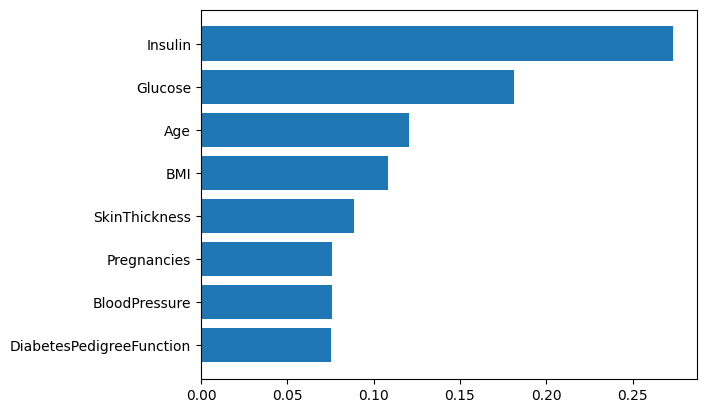

In [604]:
feature_importance_grader(best_random_xgboost)

The testing accuracy is 0.9479166666666666


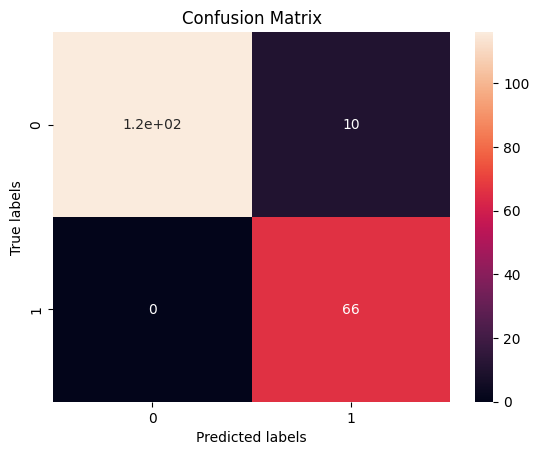

In [611]:
y_pred=manual_threshold_model(0.34, X_test, y_test, best_random_xgboost)
plot_confusion_matrix(y_test,y_pred)

### XGBoost Grid Search

In [595]:
XG_grid = GridSearchCV(xgboost_classifier,
                        param_grid=params,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=4,
                        verbose=3)

#model fitting
XG_grid.fit(X,y)

Fitting 4 folds for each of 7200 candidates, totalling 28800 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7, 0.9],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.03, 0.05, 0.1, 0.15],
                         'max_depth': [3, 4, 5, 6, 8, 10],
                         'min_child_weight': [1, 2, 3, 5],
                         'n_estimators': [50, 100, 300]},
             scoring='roc_auc', verbose=3)

In [596]:
# best parameters selected
best_grid_xgboost = XG_grid.best_estimator_
best_grid_xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [597]:
from sklearn.model_selection import cross_val_score, KFold

score=cross_val_score(best_grid_xgboost,X_train, y_train, cv=KFold(shuffle=True), scoring='roc_auc')
print('Train cross validation scores:',score)

score=cross_val_score(best_grid_xgboost,X_test, y_test, cv=KFold(shuffle=True), scoring='roc_auc')
print('Tests cross validation scores:',score)

Train cross validation scores: [0.84137709 0.82770745 0.82003955 0.90519568 0.81978233]
Tests cross validation scores: [0.91142857 0.88636364 0.8013468  0.82102273 0.97321429]


In [598]:
print(f'model score on training data: {best_grid_xgboost.score(X_train, y_train)}')
print(f'model score on testing data: {best_grid_xgboost.score(X_test, y_test)}')

model score on training data: 0.8888888888888888
model score on testing data: 0.9114583333333334


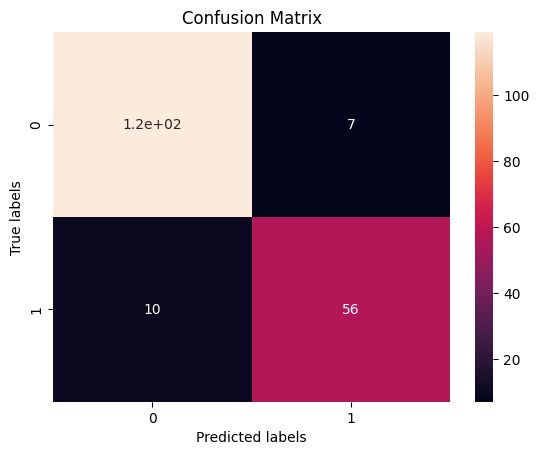

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93       126
         1.0       0.89      0.85      0.87        66

    accuracy                           0.91       192
   macro avg       0.91      0.90      0.90       192
weighted avg       0.91      0.91      0.91       192



In [599]:
y_pred = best_grid_xgboost.predict(X_test)
y_proba = best_grid_xgboost.predict_proba(X_test)

plot_confusion_matrix(y_test,y_pred)
print(classification_report(y_test, y_pred))

In [603]:
thresholds_tests (X_test, y_test, best_grid_xgboost)


******** For i = 0.05 ******
Our testing accuracy is 0.34375
[[  0 126]
 [  0  66]]

******** For i = 0.1 ******
Our testing accuracy is 0.5885416666666666
[[47 79]
 [ 0 66]]

******** For i = 0.15 ******
Our testing accuracy is 0.6822916666666666
[[65 61]
 [ 0 66]]

******** For i = 0.2 ******
Our testing accuracy is 0.7291666666666666
[[74 52]
 [ 0 66]]

******** For i = 0.25 ******
Our testing accuracy is 0.7760416666666666
[[84 42]
 [ 1 65]]

******** For i = 0.3 ******
Our testing accuracy is 0.828125
[[95 31]
 [ 2 64]]

******** For i = 0.35 ******
Our testing accuracy is 0.8541666666666666
[[101  25]
 [  3  63]]

******** For i = 0.4 ******
Our testing accuracy is 0.890625
[[109  17]
 [  4  62]]

******** For i = 0.45 ******
Our testing accuracy is 0.9010416666666666
[[113  13]
 [  6  60]]

******** For i = 0.5 ******
Our testing accuracy is 0.9114583333333334
[[119   7]
 [ 10  56]]

******** For i = 0.55 ******
Our testing accuracy is 0.921875
[[124   2]
 [ 13  53]]

******** 

Conclusion - XGBoost gives us the best model by a big margin
Though surprisingly the random search worked much better then the grid search, for the same hyperparametrs

## Making sure we have a stable Recall rate 

The best threshold value we find for minimum recall is 0.34 on the Random Search tuned XGBoost

GBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [701]:
y_pred=manual_threshold_model(0.34, X_test, y_test, best_random_xgboost)

The testing accuracy is 0.9479166666666666


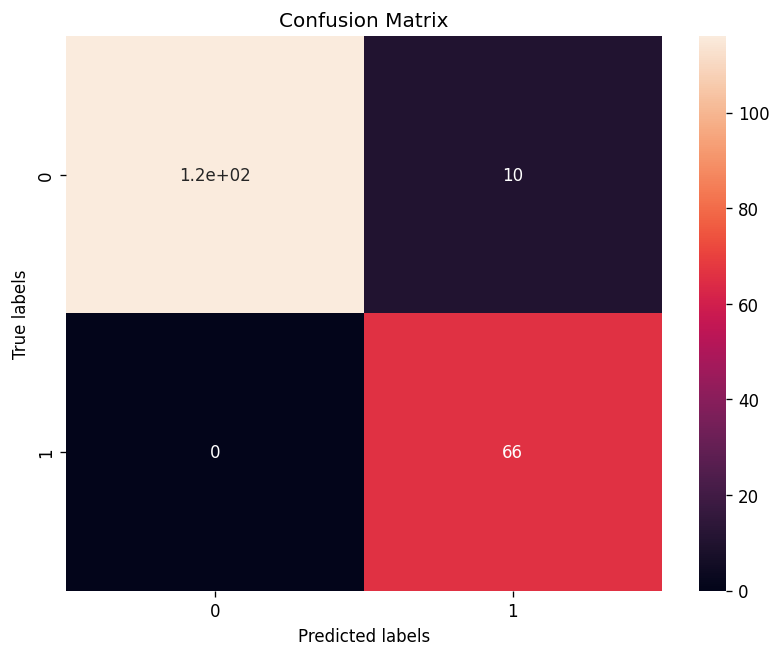

In [702]:
plot_confusion_matrix(y_test,y_pred)

In [703]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96       126
         1.0       0.87      1.00      0.93        66

    accuracy                           0.95       192
   macro avg       0.93      0.96      0.94       192
weighted avg       0.95      0.95      0.95       192



In [653]:
recall = float(classification_report(y_test, y_pred)[137:141])
recall
precision = float(classification_report(y_test, y_pred)[128:132])
precision

0.87

In [657]:
def recall_precision_calc(X, Y, model, threshold):
    y_pred=manual_threshold_model(0.34, X, Y, best_random_xgboost)
    recall = float(classification_report(Y, y_pred)[137:141])
    precision = float(classification_report(y_test, y_pred)[128:132])
    
    return recall, precision

In [658]:
recall_precision_calc(X=X_test, Y=y_test, model=best_random_xgboost, threshold=0.34)

The testing accuracy is 0.9479166666666666


(1.0, 0.87)

# Plot the results

In [ ]:
# model_dict = {
#     'Simple LogReg':
#     'Tuned LogReg':
#     'Tunded RidgeClass':
#     'Simple RandomForest':
#     'Tuned RandomForest':
#     'Simple XGBoost':
#     'RandSearch XGBoost':
#     'Grid XGBoost':1.00,0.87
#              }

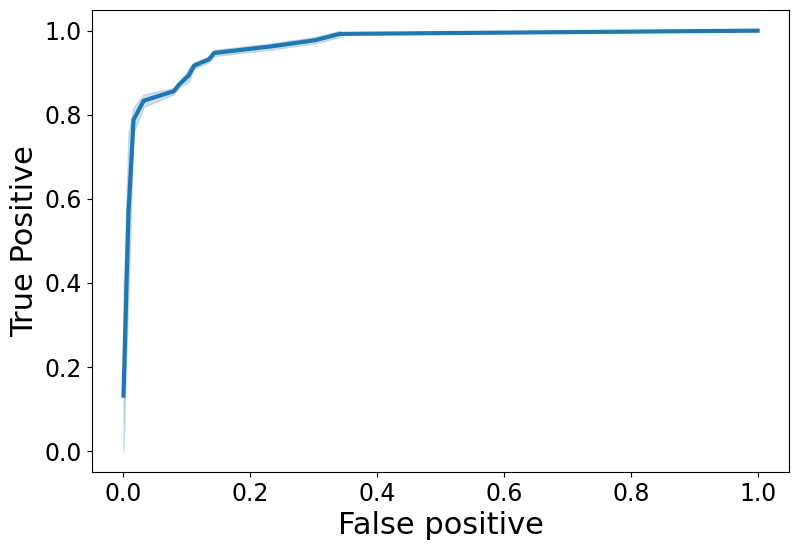

In [704]:
fpr, tpr, _ = roc_curve(y_test,y_proba[:,1])

plt.figure(figsize=(9, 6), dpi = 100)
plot = sns.lineplot(x=fpr, y=tpr, linewidth = 3) 
plot.set_xlabel("False positive", fontsize=22)
plot.set_ylabel("True Positive", fontsize=22)
plot.tick_params(labelsize=17)
plt.savefig('ROC', transparent=True, bbox_inches='tight')
plt.show() 

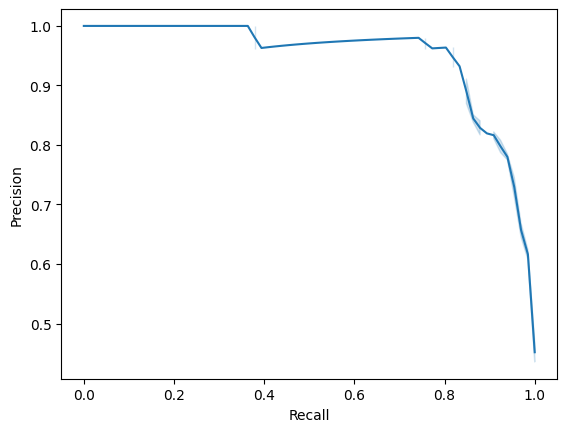

In [705]:
precision, recall, thresholds = precision_recall_curve(y_test,y_proba[:,1])

plot = sns.lineplot(x=recall, y=precision)
plot.set_xlabel('Recall')
plot.set_ylabel('Precision')
plt.show()

# *The End*